# Drought Analysis for India (Bundelkhand & Marathwada)

This notebook analyzes drought trends using Agricultural, Climate, and Groundwater datasets.

## Datasets
1. **Agricultural Data**: ICRISAT District Level Data (1966-2017)
2. **Climate Data**: 
    - CHIRPS Rainfall
    - SPEI (Standardized Precipitation Evapotranspiration Index)
    - NDVI (Normalized Difference Vegetation Index)
    - Soil Moisture
3. **Groundwater Data**: GLDAS and GRACE data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define paths
BASE_DIR = "e:/DS-Naresh IT/Projects/dhrought"
AGRI_DIR = os.path.join(BASE_DIR, "agricultural_data")
CLIMATE_DIR = os.path.join(BASE_DIR, "climate_data")
GW_DIR = os.path.join(BASE_DIR, "groundwater_data")


## 1. Data Loading and Cleaning

In [2]:
# 1.1 Agricultural Data
agri_path = os.path.join(AGRI_DIR, "icrisat_district_data.csv")
agri_df = pd.read_csv(agri_path)
print("Agricultural Data Loaded:", agri_df.shape)
agri_df.head()

Agricultural Data Loaded: (520, 80)


,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,13,1966,6,Madhya Pradesh,Sagar,15.0,7.0,466.67,209.0,68.0,...,1500.00,0.0,0.0,0.0,0.42,1.75,2.17,0.79,0.18,78.21
1,13,1967,6,Madhya Pradesh,Sagar,15.0,11.0,733.33,218.0,157.0,...,1666.67,0.0,0.0,0.0,0.42,2.01,2.43,1.01,0.15,74.62
2,13,1968,6,Madhya Pradesh,Sagar,15.3,8.0,522.88,254.6,162.0,...,2000.00,0.0,0.0,0.0,0.40,2.15,2.55,1.13,0.18,71.79
3,13,1969,6,Madhya Pradesh,Sagar,14.1,8.1,574.47,273.2,159.7,...,1666.67,0.0,0.0,0.0,0.39,2.02,2.41,1.02,0.16,70.52
4,13,1970,6,Madhya Pradesh,Sagar,14.7,10.3,700.68,270.5,172.4,...,2500.00,0.0,0.0,0.0,0.50,1.83,2.33,0.96,0.14,69.17


In [3]:
# 1.2 Climate Data

# CHIRPS Rainfall
chirps_path = os.path.join(CLIMATE_DIR, "chirps_rainfall_timeseries.xlsx")
chirps_df = pd.read_excel(chirps_path)
chirps_df['date'] = pd.to_datetime(chirps_df['date'])

# SPEI Data
bundelkhand_spei = pd.read_excel(os.path.join(CLIMATE_DIR, "bundelkhand_spei.xlsx"))
marathwada_spei = pd.read_excel(os.path.join(CLIMATE_DIR, "marathwada_spei.xlsx"))
bundelkhand_spei['date'] = pd.to_datetime(bundelkhand_spei['date'])
marathwada_spei['date'] = pd.to_datetime(marathwada_spei['dates'])

# NDVI Data
ndvi_df = pd.read_excel(os.path.join(CLIMATE_DIR, "ndvi_1998_2013.xlsx"))
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'])

# Soil Moisture (Header is likely at row 4 based on inspection)
sm_bundelkhand = pd.read_excel(os.path.join(CLIMATE_DIR, "soil_moisture_bundelkhand_2018_2025.xlsx"), header=4)
sm_all = pd.read_excel(os.path.join(CLIMATE_DIR, "soil_moisture_all_regions_2018_2025.xlsx"), header=4)

print("Climate Data Loaded")

Climate Data Loaded


In [4]:
# 1.3 Groundwater Data
gldas_2018_csv = os.path.join(GW_DIR, "gldas_2018_2023.csv")
gldas_2000_xlsx = os.path.join(GW_DIR, "gldas_2000_2002.xlsx")

gldas_recent = pd.read_csv(gldas_2018_csv)
gldas_old = pd.read_excel(gldas_2000_xlsx)

gldas_recent['date'] = pd.to_datetime(gldas_recent['date'])
gldas_old['date'] = pd.to_datetime(gldas_old['date'])

# Combine GLDAS data if schemas match (they seem to have date, ADM2_NAME, mean)
# Rename columns to match if necessary. Inspection showed 'mean' in both.
gldas_combined = pd.concat([gldas_old, gldas_recent], ignore_index=True)
print("Groundwater Data Loaded")

Groundwater Data Loaded


## 2. Analysis and Visualization

### 2.1 Rainfall Trends (CHIRPS)

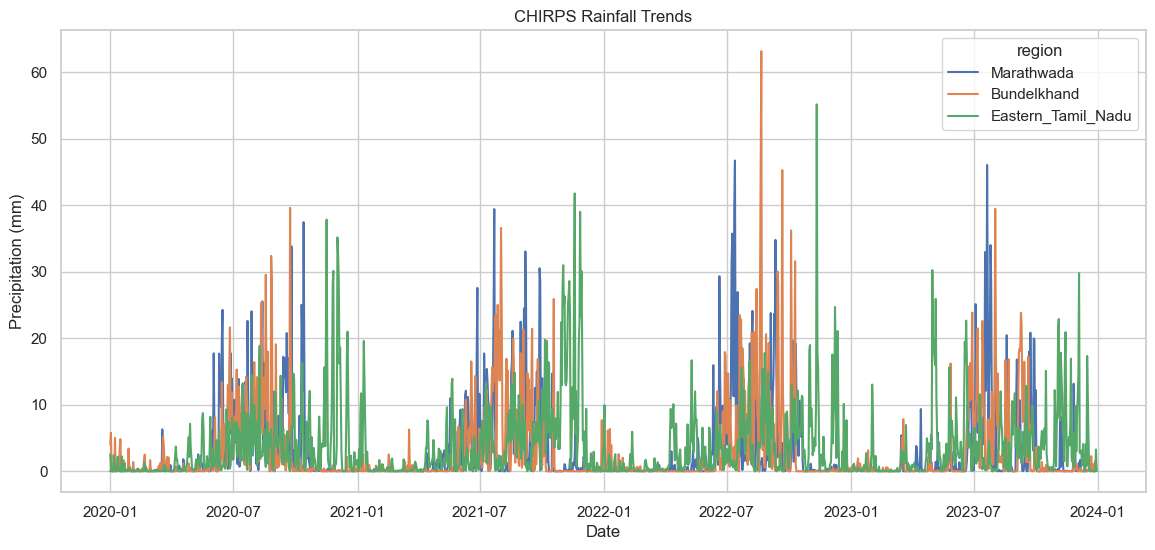

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=chirps_df, x='date', y='precipitation', hue='region')
plt.title("CHIRPS Rainfall Trends")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Date")
plt.show()

### 2.2 Drought Index (SPEI)
SPEI < -1 indicates drought conditions.

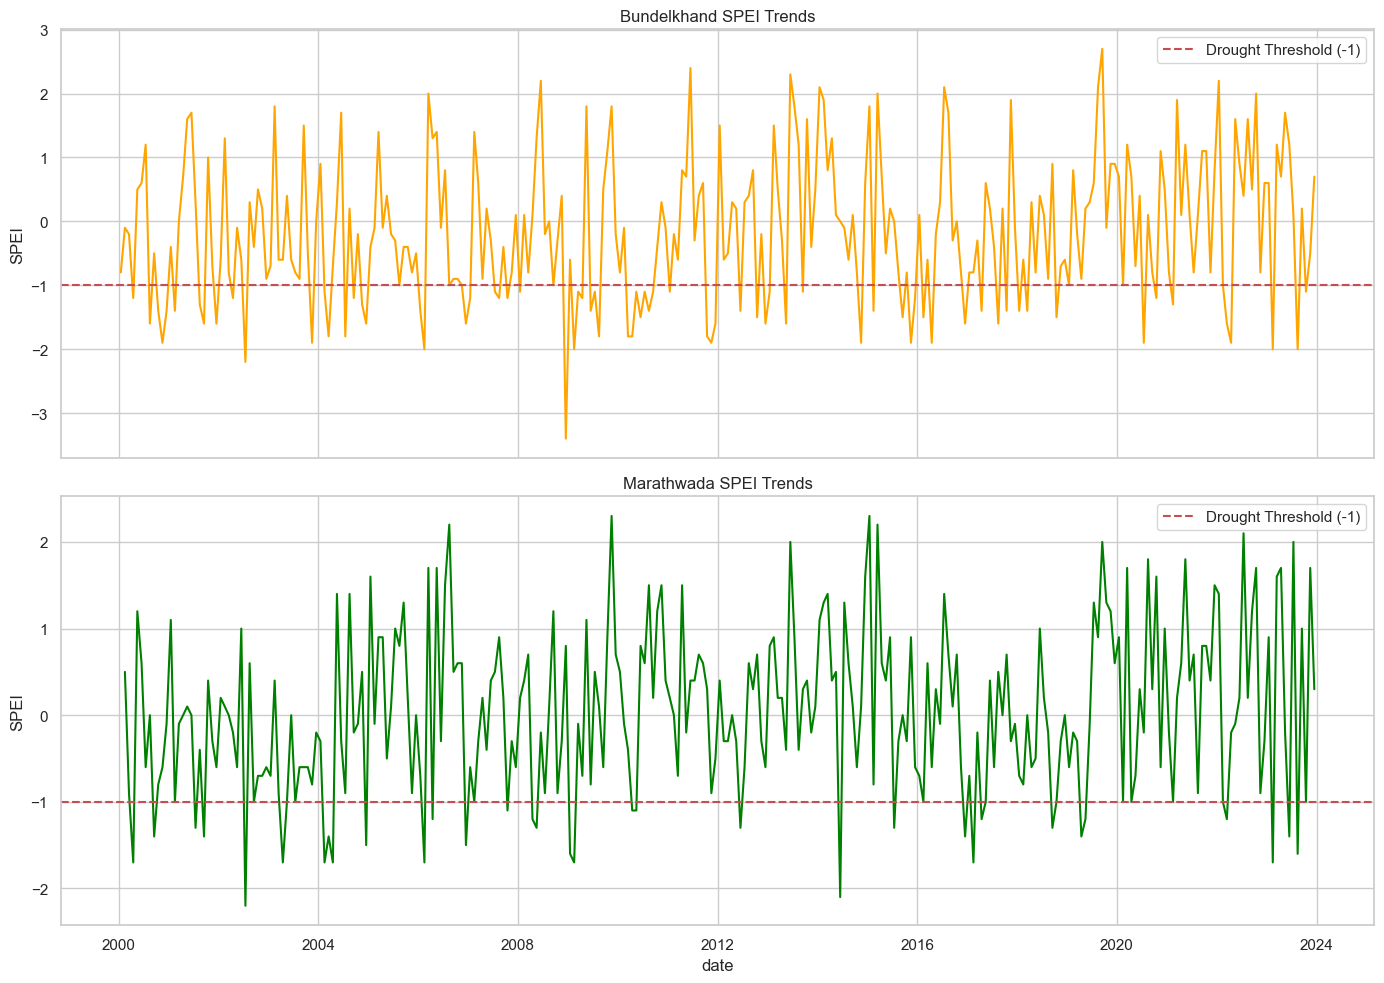

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Bundelkhand SPEI
sns.lineplot(data=bundelkhand_spei, x='date', y='spei', ax=axes[0], color='orange')
axes[0].axhline(y=-1, color='r', linestyle='--', label='Drought Threshold (-1)')
axes[0].set_title("Bundelkhand SPEI Trends")
axes[0].set_ylabel("SPEI")
axes[0].legend()

# Marathwada SPEI
sns.lineplot(data=marathwada_spei, x='date', y='spei', ax=axes[1], color='green')
axes[1].axhline(y=-1, color='r', linestyle='--', label='Drought Threshold (-1)')
axes[1].set_title("Marathwada SPEI Trends")
axes[1].set_ylabel("SPEI")
axes[1].legend()

plt.tight_layout()
plt.show()

### 2.3 Vegetation Health (NDVI)

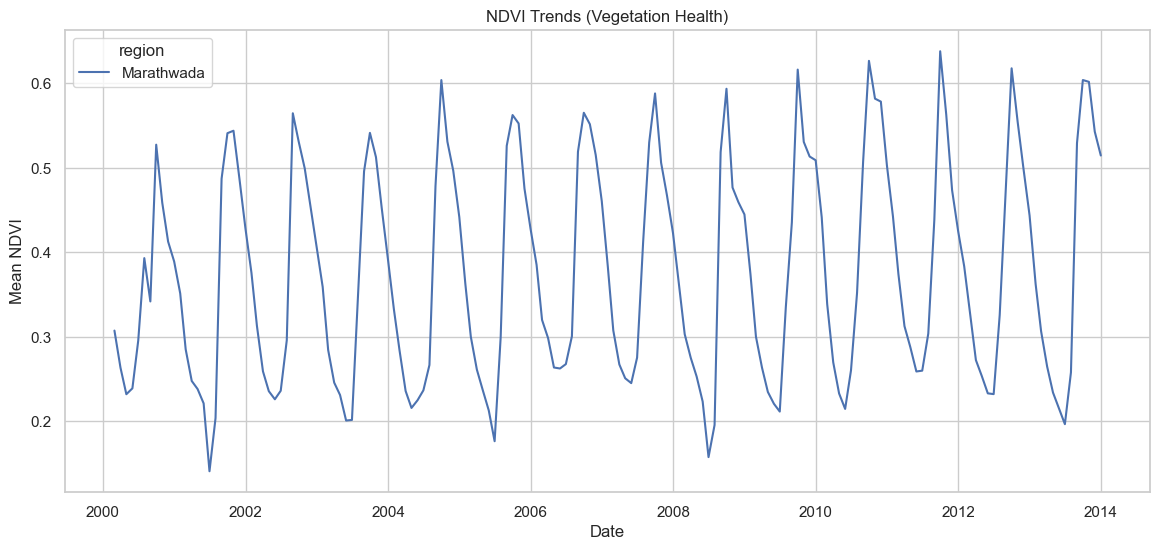

In [7]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=ndvi_df, x='date', y='NDVI_mean', hue='region')
plt.title("NDVI Trends (Vegetation Health)")
plt.ylabel("Mean NDVI")
plt.xlabel("Date")
plt.show()

### 2.4 Groundwater/Soil Moisture (GLDAS)

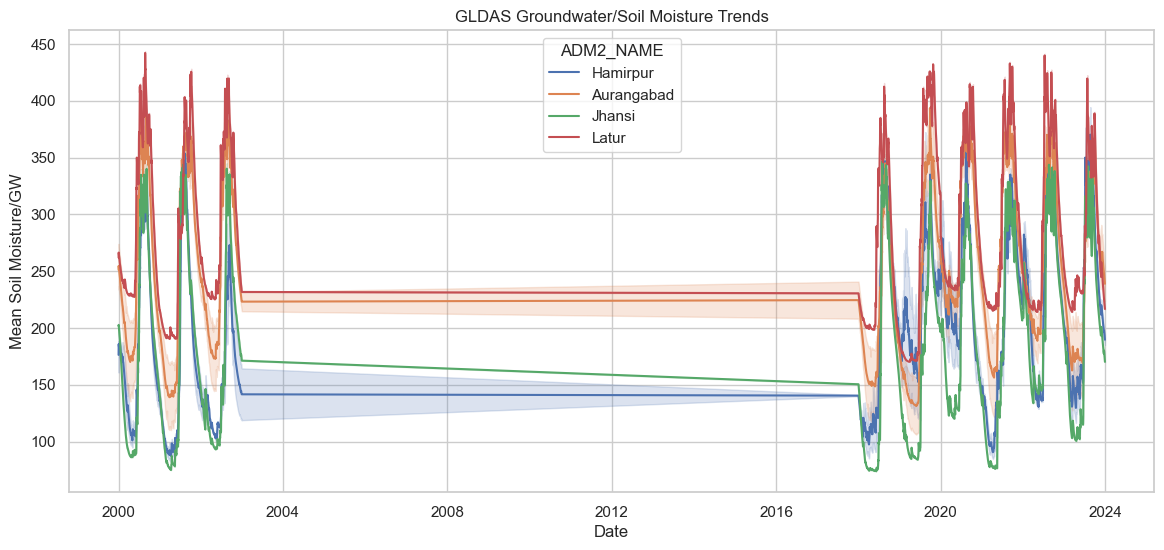

In [8]:
plt.figure(figsize=(14, 6))
# Filter for a few key districts to avoid clutter
key_districts = ['Hamirpur', 'Latur', 'Aurangabad', 'Jhansi']
subset_gldas = gldas_combined[gldas_combined['ADM2_NAME'].isin(key_districts)]

sns.lineplot(data=subset_gldas, x='date', y='mean', hue='ADM2_NAME')
plt.title("GLDAS Groundwater/Soil Moisture Trends")
plt.ylabel("Mean Soil Moisture/GW")
plt.xlabel("Date")
plt.show()

### 2.5 Agricultural Impact Analysis
Correlating Crop Yield with Climate Variables.

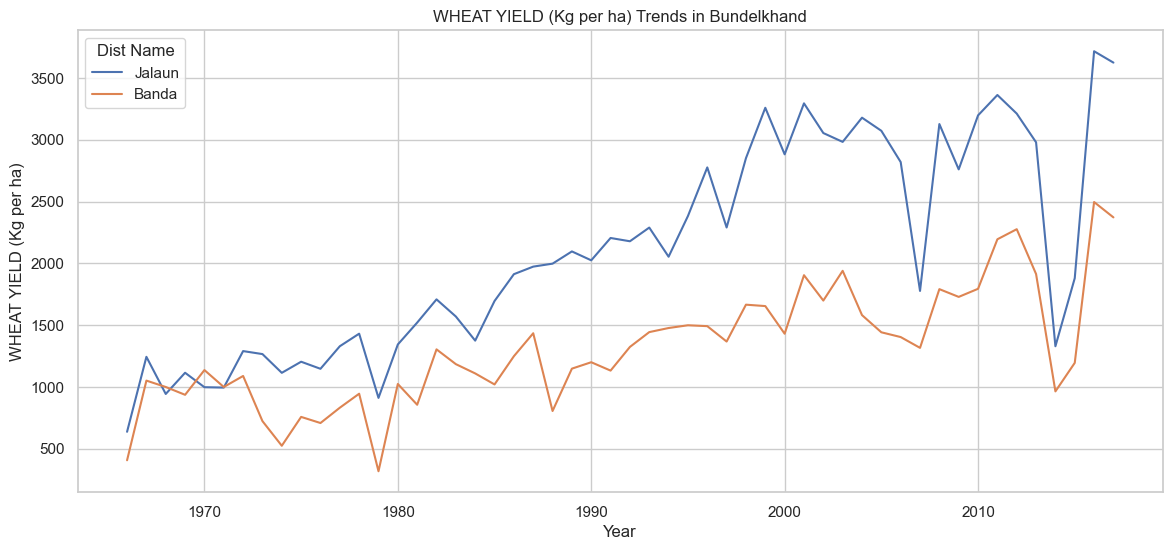

In [9]:
# Aggregate agricultural data by year and district
# Focus on a major crop, e.g., WHEAT or RICE
crop_col = 'WHEAT YIELD (Kg per ha)'
if crop_col in agri_df.columns:
    plt.figure(figsize=(14, 6))
    # Filter for Bundelkhand districts (e.g., Jhansi, Hamirpur, Banda)
    bundelkhand_districts = ['Jhansi', 'Hamirpur', 'Banda', 'Lalitpur', 'Jalaun']
    subset_agri = agri_df[agri_df['Dist Name'].isin(bundelkhand_districts)]
    
    sns.lineplot(data=subset_agri, x='Year', y=crop_col, hue='Dist Name')
    plt.title(f"{crop_col} Trends in Bundelkhand")
    plt.show()
else:
    print(f"Column {crop_col} not found.")

## 3. Findings & Detailed Analysis

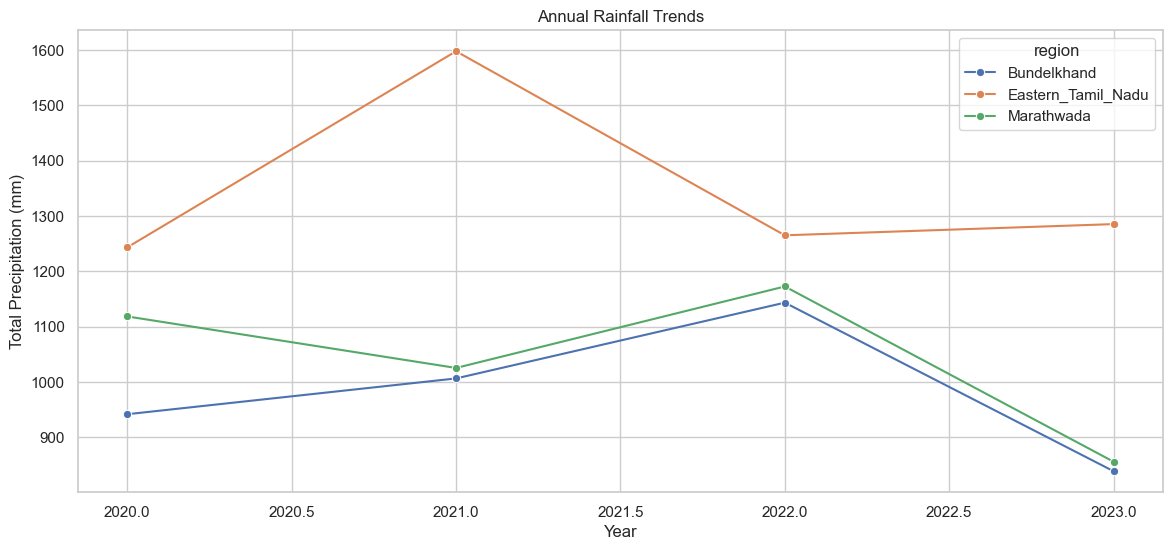

In [10]:
# 3.1 Rainfall Analysis: Annual Trends
chirps_df['year'] = chirps_df['date'].dt.year
annual_rainfall = chirps_df.groupby(['region', 'year'])['precipitation'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=annual_rainfall, x='year', y='precipitation', hue='region', marker='o')
plt.title("Annual Rainfall Trends")
plt.ylabel("Total Precipitation (mm)")
plt.xlabel("Year")
plt.show()

In [11]:
# 3.2 Identify Drought Years (SPEI < -1)
print("--- Drought Years (Bundelkhand) ---")
drought_bundelkhand = bundelkhand_spei[bundelkhand_spei['spei'] < -1]
print(drought_bundelkhand.sort_values('spei').head())

print("\n--- Drought Years (Marathwada) ---")
drought_marathwada = marathwada_spei[marathwada_spei['spei'] < -1]
print(drought_marathwada.sort_values('spei').head())

--- Drought Years (Bundelkhand) ---
          date  spei
107 2008-12-16  -3.4
30  2002-07-16  -2.2
73  2006-02-15  -2.0
109 2009-02-15  -2.0
277 2023-02-15  -2.0

--- Drought Years (Marathwada) ---
          dates  spei       date
29   2002-07-16  -2.2 2002-07-16
172  2014-06-16  -2.1 2014-06-16
38   2003-04-16  -1.7 2003-04-16
2    2000-04-16  -1.7 2000-04-16
72   2006-02-15  -1.7 2006-02-15


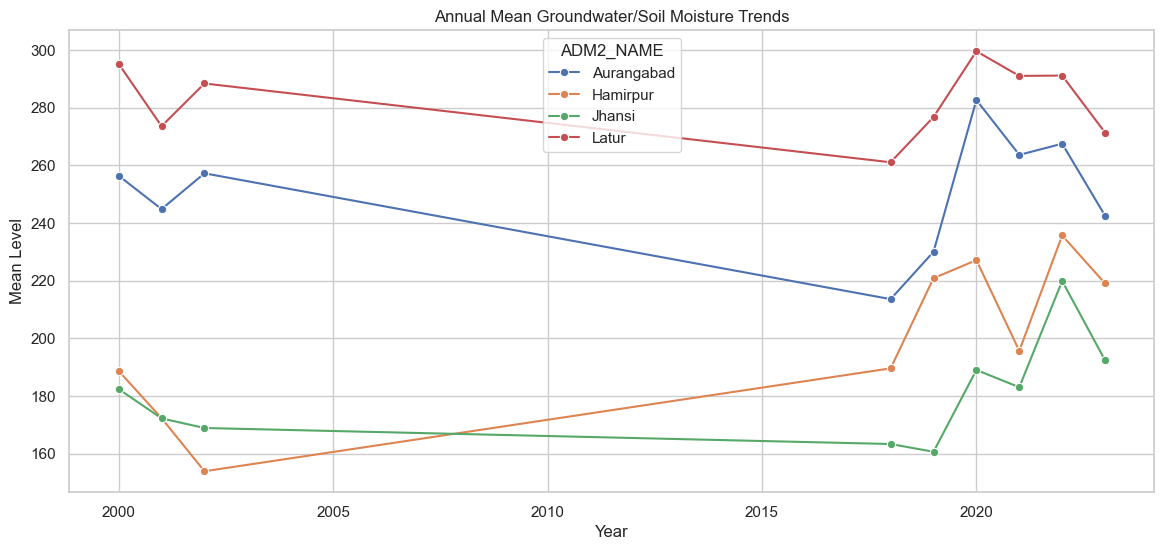

In [12]:
# 3.3 Groundwater Depletion Trends
# Aggregate by year to see long-term trends clearly
gldas_combined['year'] = gldas_combined['date'].dt.year
annual_gw = gldas_combined.groupby(['ADM2_NAME', 'year'])['mean'].mean().reset_index()

# Filter for a few districts to visualize
districts_to_plot = ['Latur', 'Jhansi', 'Aurangabad', 'Hamirpur']
subset_gw = annual_gw[annual_gw['ADM2_NAME'].isin(districts_to_plot)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=subset_gw, x='year', y='mean', hue='ADM2_NAME', marker='o')
plt.title("Annual Mean Groundwater/Soil Moisture Trends")
plt.ylabel("Mean Level")
plt.xlabel("Year")
plt.show()

In [13]:
# 3.4 Agricultural Impact: Correlation Matrix
# Let's try to merge annual rainfall with crop yield for a specific district, e.g., 'Sagar' (Bundelkhand)
district = 'Sagar'
crop = 'WHEAT YIELD (Kg per ha)'

if crop in agri_df.columns:
    # Prepare Agri Data
    agri_sagar = agri_df[agri_df['Dist Name'] == district][['Year', crop]]
    agri_sagar.columns = ['year', 'yield']

    # Prepare Rainfall Data (Using 'Bundelkhand' region rainfall for Sagar district as proxy)
    rain_bundelkhand = annual_rainfall[annual_rainfall['region'] == 'Bundelkhand'][['year', 'precipitation']]

    # Merge
    merged_df = pd.merge(agri_sagar, rain_bundelkhand, on='year')

    if not merged_df.empty:
        corr = merged_df.corr()
        print(f"Correlation between Rainfall and {crop} in {district}:")
        print(corr)
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=merged_df, x='precipitation', y='yield')
        plt.title(f"Rainfall vs {crop} in {district}")
        plt.xlabel("Annual Precipitation (mm)")
        plt.ylabel(f"{crop}")
        plt.show()
    else:
        print("Not enough data overlap to calculate correlation.")
else:
    print(f"Column {crop} not found in agricultural data.")

Not enough data overlap to calculate correlation.


## 4. Conclusion
This analysis highlights the correlation between climate variables (Rainfall, SPEI) and their impact on groundwater levels and agricultural yields in drought-prone regions of India.